In [ ]:
%load_ext autoreload
# ! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: Wavelet

First, lets generate some data and plot it.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from slipper.sample import LogPsplineSampler
from slipper.plotting import set_plotting_style
from slipper.plotting.plot_spline_model_and_data import plot_spline_model_and_data
from slipper.plotting.utils import convert_axes_spines_to_arrows


def func(x):
    return 1 / (x ** 2 + 1) * np.cos(np.pi * x)


n_obs = 600
np.random.seed(0)

# make example data
x = np.linspace(-3, 3, n_obs)
y = func(x) + np.random.normal(0, 0.2, len(x))


# move data to be positive
scaling = np.abs(min(y))
y = y + scaling
y = y / np.max(y)

# plot example data
set_plotting_style()
fig, ax = plt.subplots()
ax.plot(y, '.k', label='data')
true_y = func(x) + scaling
true_y = true_y / np.max(true_y)
ax.plot(true_y, '-r', label='True', lw=3, alpha=0.8, zorder=10)
convert_axes_spines_to_arrows(ax)
ax.set_xticks([])
ax.set_yticks([])
ax.legend();


In [ ]:
mcmc_objs = []
n_basis = [5, 10, 15, 30]
for k in n_basis:
    mcmc_ = LogPsplineSampler.fit(
        data=y,
        sampler_kwargs=dict(Ntotal=500, burnin=100),
        spline_kwargs=dict(knot_locator_type='data_peak', k=k)
    )
    mcmc_objs.append(mcmc_)


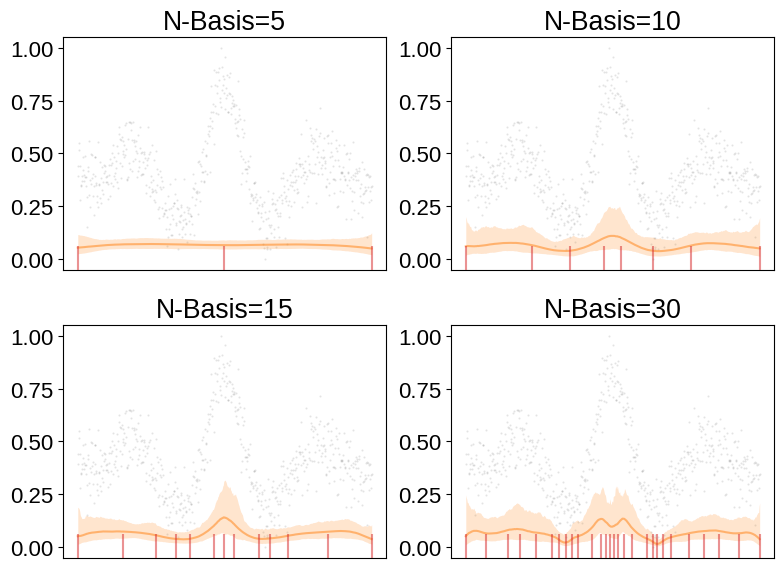

In [19]:
def make_mcmc_plots(mcmc_objs):
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    for i, ax in enumerate(axes.ravel()):
        mc = mcmc_objs[i]
        fig = plot_spline_model_and_data(
            mc.data/np.max(mc.data), mc.psd_quantiles,
            separarte_y_axis=False, knots=mc.knots, ax=ax,
            hide_axes=False
        )
        ax.set_title(f'N-Basis={len(mc.basis.T)}')

    fig.tight_layout()
    return fig


fig = make_mcmc_plots(mcmc_objs)